## Gráficos com Seaborn - Parte 1

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters() #Modifica o dicionário globalmatplotlib.units.registry e adiciona conversores personalizados 
import matplotlib.pyplot as plt #Fornece uma interface similar ao MATLAB
%matplotlib inline
import seaborn as sns

In [2]:
#Lê o arquivo csv
choco_data = pd.read_csv('chocolate.csv',index_col='ref',parse_dates = True)

In [3]:
#Exibe as cinco primeiras linhas
choco_data.head()

,Unnamed: 0,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
ref,,,,,,,,,,,,,,,,,,,,
2454,0,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
2458,1,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2454,2,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
797,3,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
797,4,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


Text(0, 0.5, 'Count of Ingredients')

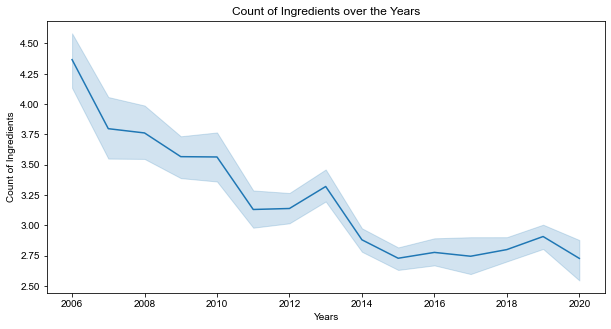

In [4]:
#Faz um gráfico de linhas
plt.figure(figsize=(10,5))
plt.title('Count of Ingredients over the Years')
sns.lineplot(data=choco_data,x='review_date',y='counts_of_ingredients')
sns.set_style('dark')
plt.xlabel('Years')
plt.ylabel('Count of Ingredients')

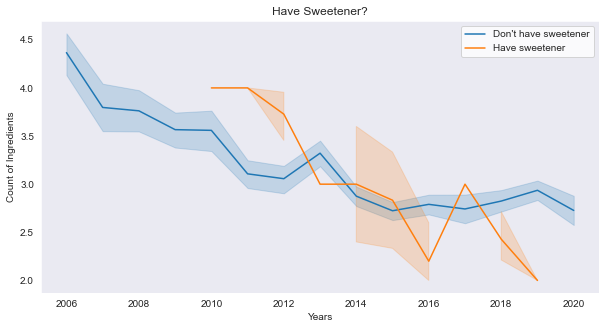

In [5]:
#Gráfico de linhas com categorias
plt.figure(figsize=(10,5))
plt.title('Have Sweetener?')
sns.lineplot(data=choco_data,x='review_date',y='counts_of_ingredients',hue='sweetener_without_sugar')
sns.set_style('white')
plt.xlabel('Years')
plt.ylabel('Count of Ingredients')
plt.legend(["Don't have sweetener","Have sweetener"],loc='upper right')

In [6]:
#Agrupa company_location e have_sugar
choco_data.groupby(['company_location','sugar']).sugar.count()

company_location  sugar         
Argentina         have_sugar          4
Australia         have_sugar         51
Austria           have_not_sugar     17
                  have_sugar         13
Belgium           have_not_sugar      1
                                   ... 
U.k.              have_sugar        109
Vanuatu           have_sugar          4
Venezuela         have_sugar         31
Vietnam           have_sugar         15
Wales             have_sugar          1
Name: sugar, Length: 80, dtype: int64

Text(0.5, 0, 'Rating')

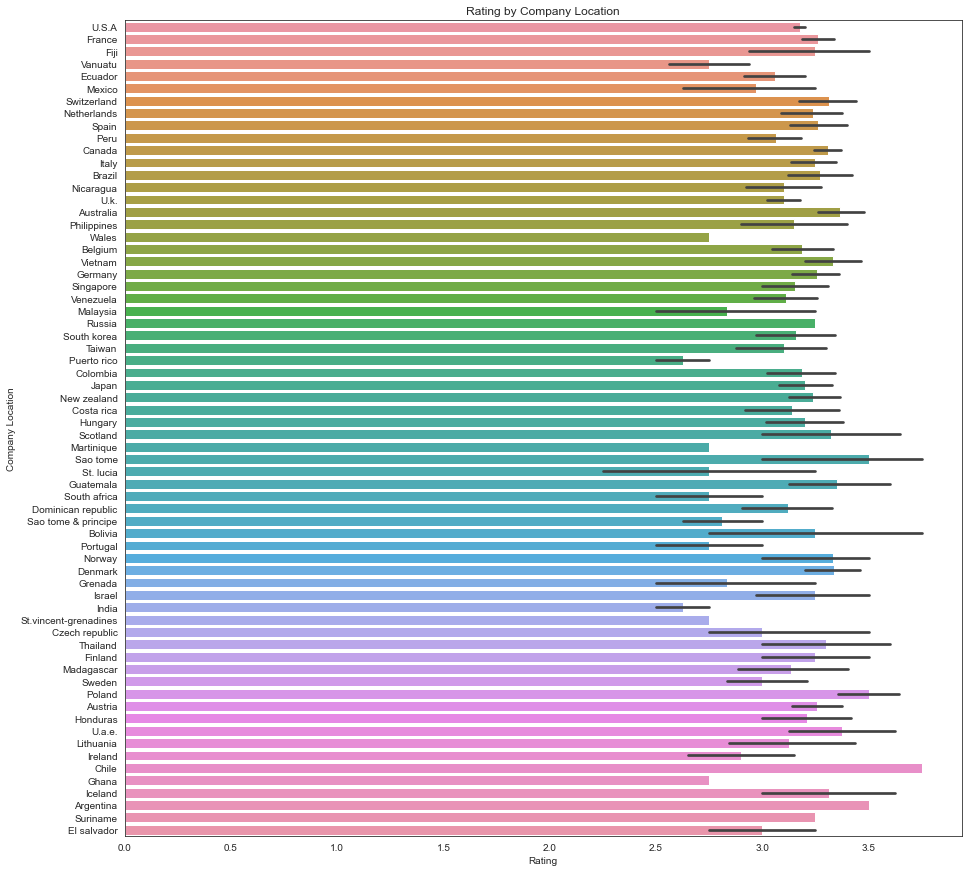

In [7]:
#Faz um gráfico de barras
plt.figure(figsize=(15,15))
plt.title('Rating by Company Location')
sns.barplot(x=choco_data['rating'],y=choco_data['company_location'])
plt.ylabel('Company Location')
plt.xlabel('Rating')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of the Years')

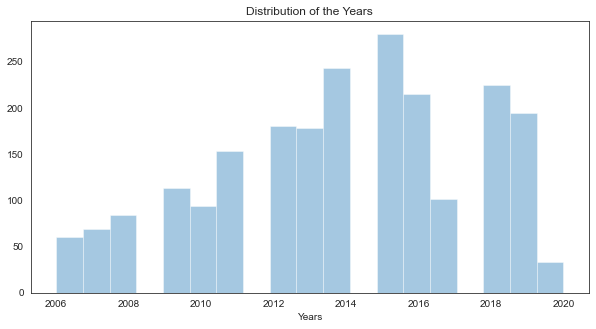

In [8]:
#Distribuição
plt.figure(figsize=(10,5))
sns.distplot(choco_data['review_date'],kde=False)
plt.xlabel('Years')
plt.title('Distribution of the Years')

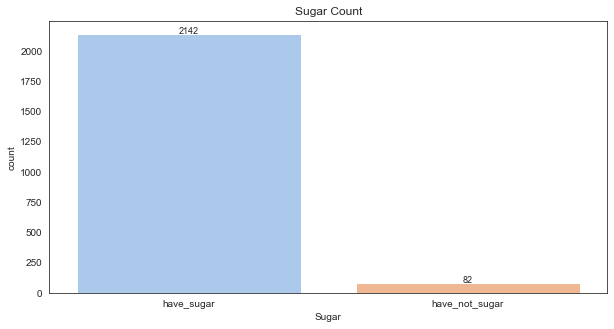

In [9]:
#Contagem
plt.figure(figsize=(10,5))
ax = sns.countplot(x=choco_data['sugar'],palette='pastel')
plt.title('Sugar Count')
plt.xlabel('Sugar')

#Mostrar rótulos nas barras
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height()+0.25,p.get_height(),horizontalalignment='center', fontsize = 9)